In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from plotting_tools import * 

In [4]:
experiment_series ="20250529"
precipitation_setting = "Regen"
decay_setting = "decay"

plot_path = f"../plots/{experiment_series}/concentration"
os.makedirs(plot_path, exist_ok=True)

In [5]:
# Load the data
result_path = f"../../preprocessing/preprocessed_data/{experiment_series}/"

df = pd.read_csv(f"{result_path}/substances/{decay_setting}_{precipitation_setting}_output.csv")

df_measurements = pd.read_csv(f"{result_path}/../concentration_measurements.csv")


In [6]:
df["Date"] = pd.to_datetime(start_date) + pd.to_timedelta(df["time_in_minutes"], unit="min")

/tmp/ipykernel_27091/2486756841.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df["location"] = covid_df["manhole"].map(manhole_names)


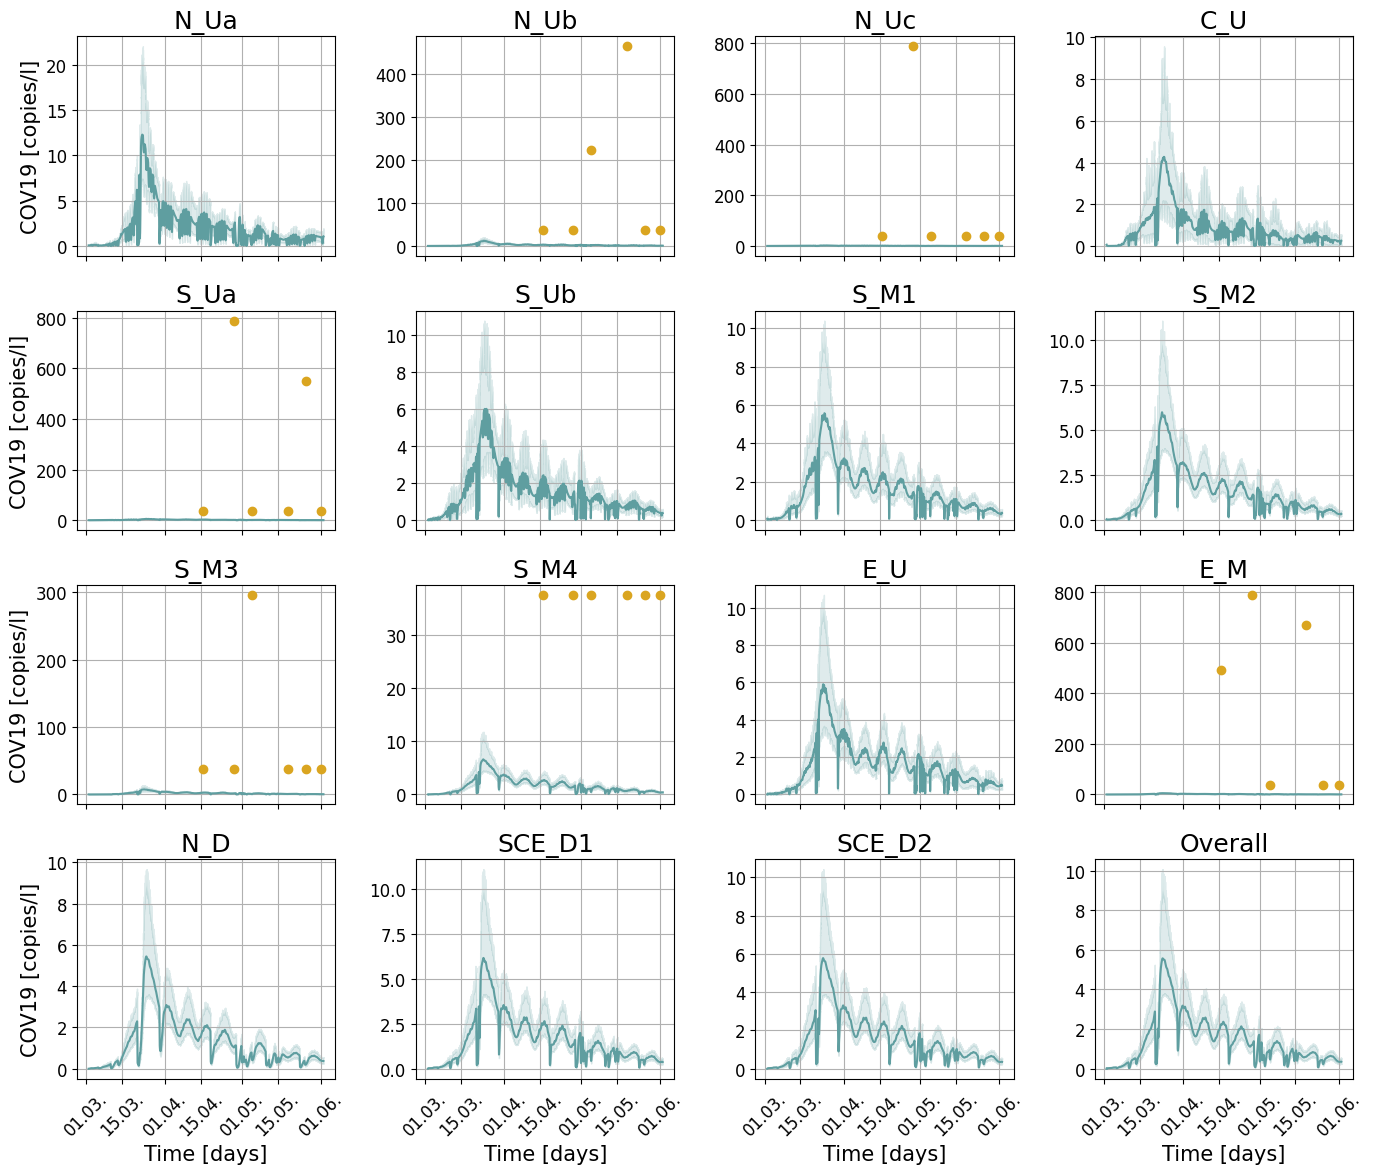

In [12]:
# Filter data
covid_df = df[(df["variable"] == "COV19") & (df["manhole"].isin(manhole_names.keys()))]
covid_df["location"] = covid_df["manhole"].map(manhole_names)

# Sort locations for consistency
locations_sorted = manhole_names.values()

# Set up 4x2 subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(14, 12), sharex=True)
axes = axes.flatten()


for i, location in enumerate(locations_sorted, start=0):  
    print(location)  
    ax = axes[i]
    ax.grid(True)

    group = covid_df.loc[covid_df["location"] == location,:].copy()
    measurements = df_measurements.loc[df_measurements["Location"] == location,:].copy()
    sns.lineplot(data=group, x="Date", y="value", color="cadetblue", ax=ax)

    ax.scatter(measurements.loc[measurements.Below_threshold,["Date"]], measurements.loc[measurements.Below_threshold,"Value"], color="grey", zorder=10)
    ax.scatter(measurements.loc[~measurements.Below_threshold,["Date"]], measurements.loc[~measurements.Below_threshold,"Value"], color="goldenrod", zorder=10)

    ax.set_title(location)
    if i%4 == 0:
        ax.set_ylabel("COV19 [copies/l]")
    else:
        ax.set_ylabel("")
    
# Set x-labels for bottom row only
for ax in axes[-4:]:
    ax.set_xlabel("Time [days]")
    
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d.%m."))  # Format without year

# Add overall title
plt.tight_layout()

plt.savefig(f"{plot_path}/{decay_setting}_{precipitation_setting}_COV19.png", dpi=300, bbox_inches="tight")

plt.show()


/tmp/ipykernel_11694/2497022646.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pmmov_df["location"] = pmmov_df["manhole"].map(manhole_names)


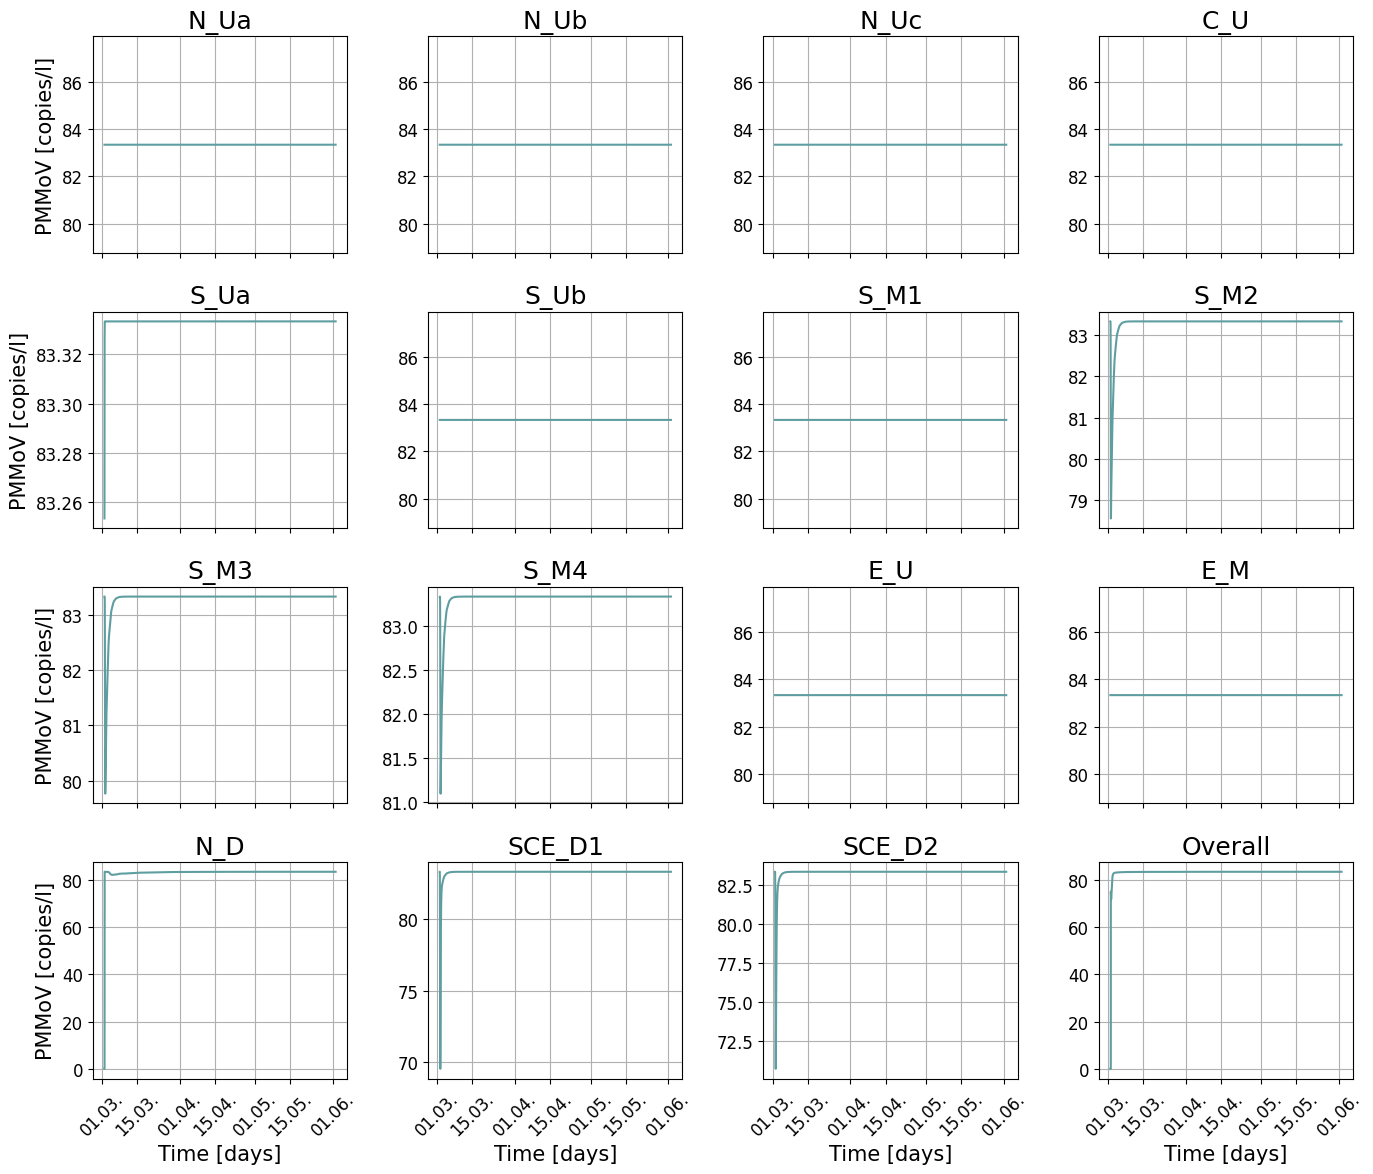

In [36]:
# Filter data
pmmov_df = df[(df["variable"] == "PMMoV") & (df["manhole"].isin(manhole_names.keys()))]
pmmov_df["location"] = pmmov_df["manhole"].map(manhole_names)

# Sort locations for consistency
locations_sorted = manhole_names.values()

# Set up 4x2 subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(14, 12), sharex=True)
axes = axes.flatten()


for i, location in enumerate(locations_sorted, start=0):    
    ax = axes[i]
    ax.grid(True)

    group = pmmov_df[pmmov_df["location"] == location]
    ax.plot(group["Date"], group["value"], color="cadetblue")

    ax.set_title(location)
    if i%4 == 0:
        ax.set_ylabel("PMMoV [copies/l]")
    else:
        ax.set_ylabel("")

# Set x-labels for bottom row only
for ax in axes[-4:]:
    ax.set_xlabel("Time [days]")
    
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d.%m."))  # Format without year

# Add overall title
plt.tight_layout()

plt.savefig(f"{plot_path}/{decay_setting}_{precipitation_setting}_{memilio_id}_PMMoV.png", dpi=300, bbox_inches="tight")

plt.show()
